In [3]:
import pandas as pd

# Correct file name
df = pd.read_csv('habits.csv')

# Preview the data
print(df.head())


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

Column Names: Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


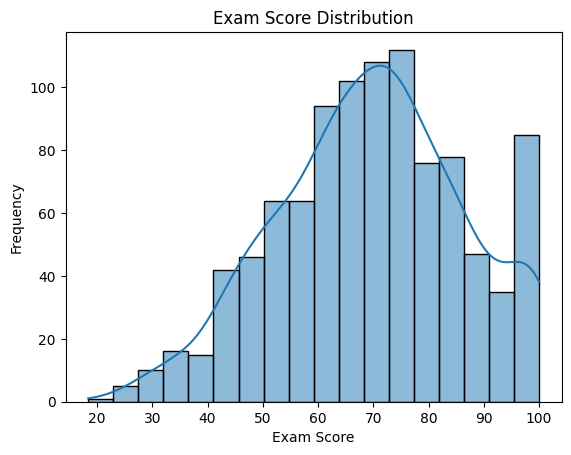

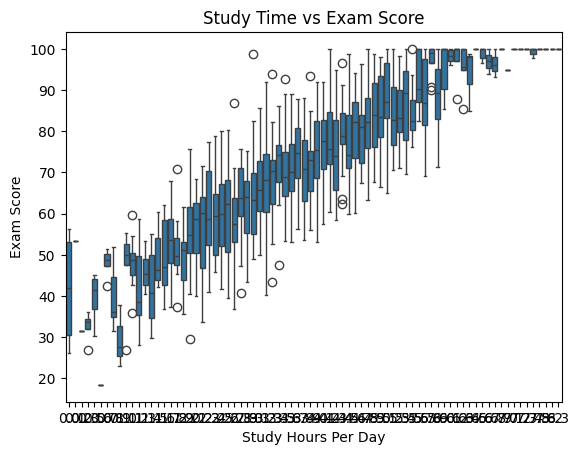

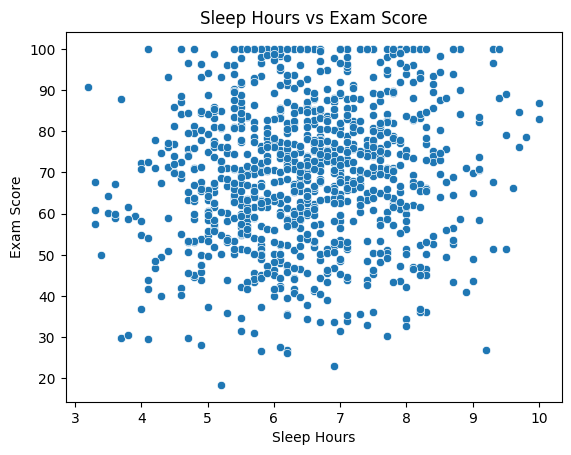

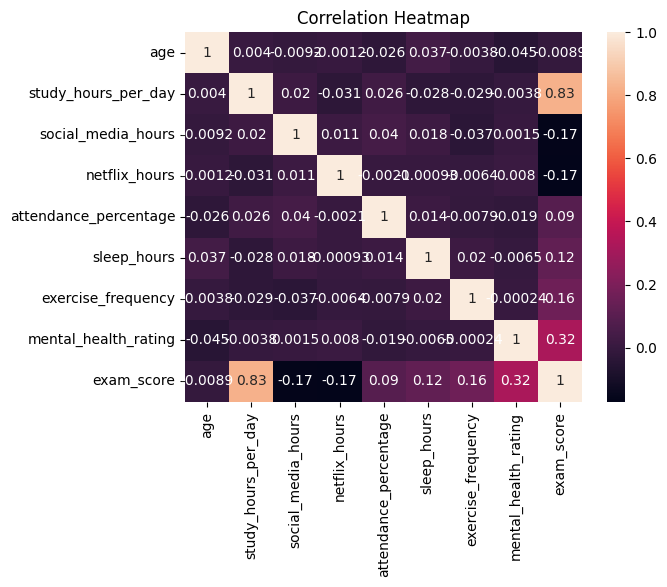

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("habits.csv")

# Optional: Clean column names (strip whitespace)
df.columns = df.columns.str.strip()

# Check column names to avoid KeyError
print("Column Names:", df.columns)

# Histogram: Exam Score Distribution
sns.histplot(df['exam_score'], kde=True)
plt.title("Exam Score Distribution")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot: Study Hours Per Day vs Exam Score
sns.boxplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title("Study Time vs Exam Score")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Exam Score")
plt.show()

# Scatter Plot: Sleep Hours vs Exam Score
sns.scatterplot(x='sleep_hours', y='exam_score', data=df)
plt.title("Sleep Hours vs Exam Score")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()

# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [8]:
import statsmodels.api as sm

# Correct column names based on your dataset
X = df[['study_hours_per_day']]
y = df['exam_score']

# Add a constant (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2134.
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          4.60e-250
Time:                        23:07:24   Log-Likelihood:                -3673.3
No. Observations:                1000   AIC:                             7351.
Df Residuals:                     998   BIC:                             7360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  35.9102    

In [9]:
from scipy.stats import ttest_ind

# Example assumes 'diet_quality' has values like 'Good' or 'Poor'
group_good = df[df['diet_quality'] == 'Good']['exam_score']
group_poor = df[df['diet_quality'] == 'Poor']['exam_score']

t_stat, p_val = ttest_ind(group_good, group_poor)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Significant difference → Diet quality affects exam score")
else:
    print("No significant difference in scores based on diet quality")


T-statistic: 0.81, P-value: 0.4189
No significant difference in scores based on diet quality


In [11]:
from scipy.stats import f_oneway
import pandas as pd

# Step 1: Group sleep_hours into bins
df['sleep_group'] = pd.cut(
    df['sleep_hours'],
    bins=[0, 5, 7, 9, 12],
    labels=["Low", "Moderate", "Optimal", "Excess"]
)

# Step 2: Group exam_score by sleep_group
groups = df.groupby('sleep_group', observed=True)['exam_score'].apply(list)


# Step 3: Perform ANOVA
f_stat, p_val = f_oneway(*groups)

# Step 4: Output results
print(f"F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("At least one sleep group differs → Sleep group matters")
else:
    print("No significant difference between sleep groups")


F-statistic: 5.96, P-value: 0.0005
At least one sleep group differs → Sleep group matters


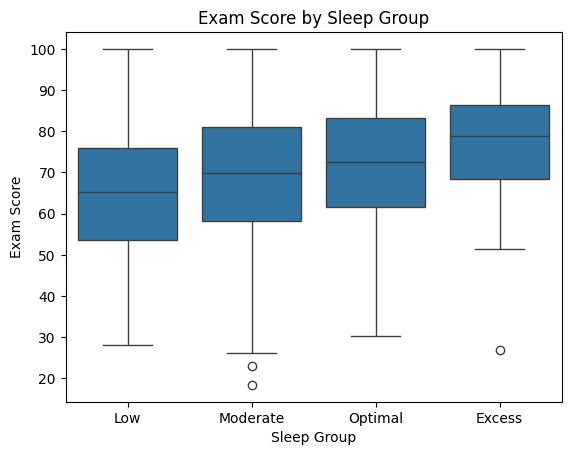

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sleep_group', y='exam_score', data=df)
plt.title("Exam Score by Sleep Group")
plt.xlabel("Sleep Group")
plt.ylabel("Exam Score")
plt.show()
